In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
data = np.genfromtxt(r'E:\dataglacier\bank-additional\bank-additional-full.csv', delimiter=';',encoding='utf-8', dtype=None, names=True)
df1 = pd.DataFrame(data)

In [452]:
df=df1

# removing the double quots ""

In [401]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].str.replace('"', '')

In [402]:
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [404]:
df1['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  object 
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int32  
 11  campaign      41188 non-null  int32  
 12  pdays         41188 non-null  int32  
 13  previous      41188 non-null  int32  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [406]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

# In this dataset  the NA values are replaced with "unknonw"
therefore am going to replace unkonw with median rather than mean because:
1. Mean is sensitive to outliers. This introduces biased as outliers disproportionately influence the mean, potentially lead to distored analysis
2. Median is not sensitive to outliers. This is because the median is the middle value when the data is sorted.
# Generally, replacing NA values with the median is preferred since:
1. It is robust to skewed distribution
2. It preseves the original data distribution
 3. It provides a more accurate measure of the central tendancy in non-normal distribution.

In [407]:
# dealing with age
obj= df.select_dtypes(include=['object']).columns
print(obj), len(obj)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


(None, 12)

In [409]:
obj= df.select_dtypes(include=['object']).columns
len(obj)
all_strings =[]
for i in obj:
    all_strings.append(df[i].unique())

all_strings

[array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [410]:
single_list=[]
for u in all_strings:
    single_list.extend(u)
single_list

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student',
 'married',
 'single',
 'divorced',
 'unknown',
 'basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate',
 'no',
 'unknown',
 'yes',
 'no',
 'yes',
 'unknown',
 'no',
 'yes',
 'unknown',
 'telephone',
 'cellular',
 'may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'mar',
 'apr',
 'sep',
 'mon',
 'tue',
 'wed',
 'thu',
 'fri',
 'nonexistent',
 'failure',
 'success',
 'no',
 'yes']

In [411]:
unique_list=list(set(single_list))


In [412]:
diff=[x for x in unique_list if x not in single_list]
len(diff)

0

In [413]:
obj_dict={}
for i , j in enumerate(single_list):
    obj_dict[j] = i+1

obj_dict

{'housemaid': 1,
 'services': 2,
 'admin.': 3,
 'blue-collar': 4,
 'technician': 5,
 'retired': 6,
 'management': 7,
 'unemployed': 8,
 'self-employed': 9,
 'unknown': 33,
 'entrepreneur': 11,
 'student': 12,
 'married': 13,
 'single': 14,
 'divorced': 15,
 'basic.4y': 17,
 'high.school': 18,
 'basic.6y': 19,
 'basic.9y': 20,
 'professional.course': 21,
 'university.degree': 23,
 'illiterate': 24,
 'no': 54,
 'yes': 55,
 'telephone': 34,
 'cellular': 35,
 'may': 36,
 'jun': 37,
 'jul': 38,
 'aug': 39,
 'oct': 40,
 'nov': 41,
 'dec': 42,
 'mar': 43,
 'apr': 44,
 'sep': 45,
 'mon': 46,
 'tue': 47,
 'wed': 48,
 'thu': 49,
 'fri': 50,
 'nonexistent': 51,
 'failure': 52,
 'success': 53}

In [414]:
final_dict={}

for r in all_strings:
    value =0
    for t in r:
        final_dict[t]=value
        value +=1
final_dict

{'housemaid': 0,
 'services': 1,
 'admin.': 2,
 'blue-collar': 3,
 'technician': 4,
 'retired': 5,
 'management': 6,
 'unemployed': 7,
 'self-employed': 8,
 'unknown': 2,
 'entrepreneur': 10,
 'student': 11,
 'married': 0,
 'single': 1,
 'divorced': 2,
 'basic.4y': 0,
 'high.school': 1,
 'basic.6y': 2,
 'basic.9y': 3,
 'professional.course': 4,
 'university.degree': 6,
 'illiterate': 7,
 'no': 0,
 'yes': 1,
 'telephone': 0,
 'cellular': 1,
 'may': 0,
 'jun': 1,
 'jul': 2,
 'aug': 3,
 'oct': 4,
 'nov': 5,
 'dec': 6,
 'mar': 7,
 'apr': 8,
 'sep': 9,
 'mon': 0,
 'tue': 1,
 'wed': 2,
 'thu': 3,
 'fri': 4,
 'nonexistent': 0,
 'failure': 1,
 'success': 2}

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int32  
 11  campaign      41188 non-null  int32  
 12  pdays         41188 non-null  int32  
 13  previous      41188 non-null  int32  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [416]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].map(final_dict)

df



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,2,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,0,1,0,1,5,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [417]:
df['month'].value_counts().sort_values()

month
6      182
7      546
9      570
4      718
8     2632
5     4101
1     5318
3     6178
2     7174
0    13769
Name: count, dtype: int64

In [420]:
# columns with unknown
# job, marital, education, default, housing, loan

In [421]:
df['job'].median(),df['marital'].median(), df['education'].median(), df['default'].median(),df['housing'].median(),df['loan'].median()

(3.0, 0.0, 3.0, 0.0, 1.0, 0.0)

# From the dictionary final_dict value 2 represents "unknown"
Thus am going to replace all unknown (2) with with their medians 

In [422]:
df['job'] =df['job'].replace({2:3.0})
df['marital'] =df['marital'].replace({2:0.0})
df['education'] = df['education'].replace({2: 3.0})
df['default'] = df['default'].replace({2:0.0})
df['housing'] = df['housing'].replace({2:1.0})
df['loan'] =df['loan'].replace({2:0.0})

In [439]:
df= df.sample(frac=1,ignore_index=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,41,5,1,0,0,1,0,1,4,4,...,1,999,0,0,-1.1,94.601,-49.5,0.942,4963.6,0
1,37,3,0,3,0,1,0,1,8,3,...,2,999,1,1,-1.8,93.075,-47.1,1.435,5099.1,0
2,36,3,0,3,0,1,0,0,0,2,...,2,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0
3,44,4,0,4,0,0,1,1,3,2,...,2,999,0,0,1.4,93.444,-36.1,4.964,5228.1,0
4,56,3,0,3,0,1,0,1,3,1,...,3,999,0,0,1.4,93.444,-36.1,4.966,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,28,6,1,6,0,1,0,1,2,2,...,9,999,0,0,1.4,93.918,-42.7,4.963,5228.1,0
41184,48,4,0,3,0,0,0,0,1,3,...,1,999,0,0,1.4,94.465,-41.8,4.958,5228.1,0
41185,36,3,1,3,0,1,0,1,0,3,...,1,999,0,0,-1.8,92.893,-46.2,1.266,5099.1,0
41186,52,10,0,6,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [451]:
final_dict

{'housemaid': 0,
 'services': 1,
 'admin.': 2,
 'blue-collar': 3,
 'technician': 4,
 'retired': 5,
 'management': 6,
 'unemployed': 7,
 'self-employed': 8,
 'unknown': 2,
 'entrepreneur': 10,
 'student': 11,
 'married': 0,
 'single': 1,
 'divorced': 2,
 'basic.4y': 0,
 'high.school': 1,
 'basic.6y': 2,
 'basic.9y': 3,
 'professional.course': 4,
 'university.degree': 6,
 'illiterate': 7,
 'no': 0,
 'yes': 1,
 'telephone': 0,
 'cellular': 1,
 'may': 0,
 'jun': 1,
 'jul': 2,
 'aug': 3,
 'oct': 4,
 'nov': 5,
 'dec': 6,
 'mar': 7,
 'apr': 8,
 'sep': 9,
 'mon': 0,
 'tue': 1,
 'wed': 2,
 'thu': 3,
 'fri': 4,
 'nonexistent': 0,
 'failure': 1,
 'success': 2}

<Axes: xlabel='housing', ylabel='Count'>

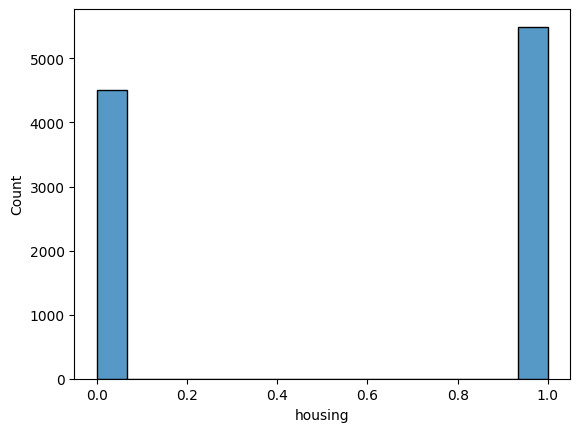

In [440]:
sns.histplot(df['housing'][:10000])
# yes = 1 and no =0

Text(0.5, 1.0, 'Education')

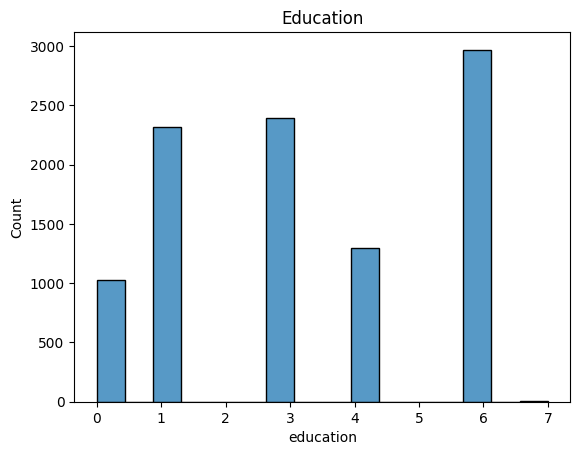

In [449]:
sns.histplot(df['education'][:10000])
plt.title("Education")
#'basic.4y': 0,'high.school': 1,'basic.6y': 2,'basic.9y': 3
# 'professional.course': 4,'university.degree': 6,'illiterate': 7,

Text(0.5, 1.0, 'Age')

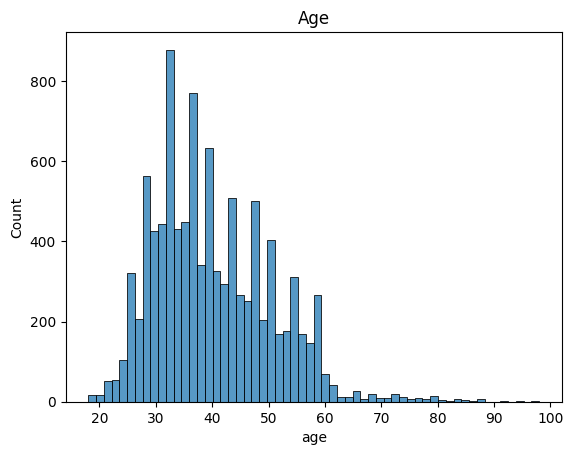

In [448]:
sns.histplot(df['age'][:10000])
plt.title('Age')

Text(0.5, 1.0, 'loan')

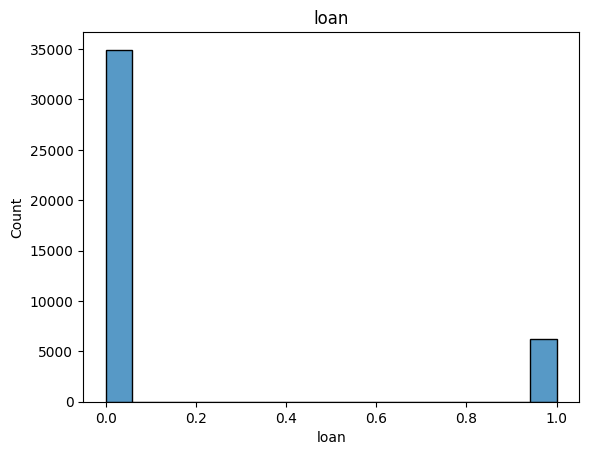

In [447]:
sns.histplot(df['loan'])
plt.title('loan')
# yes =1 , mo =0.0

<Axes: xlabel='job', ylabel='Count'>

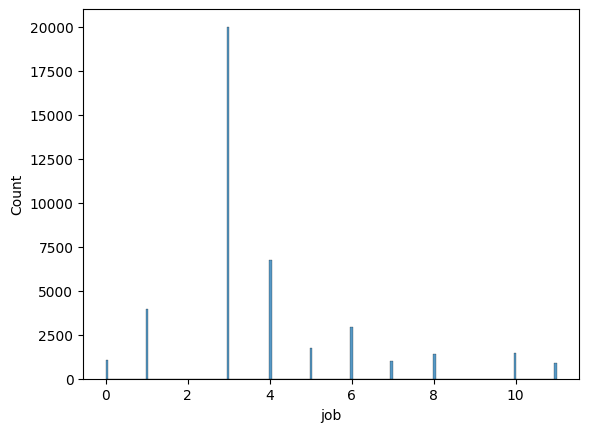

In [444]:
sns.histplot(df1['job'])
plt.title('job')
#'housemaid': 0,'services': 1,'admin.': 2,'blue-collar': 3,
# 'technician': 4,'retired': 5,
# 'management': 6,'unemployed': 7,'self-employed': 8,'unknown': 2,
# 'entrepreneur': 10,'student': 11,

Text(0.5, 1.0, 'contact')

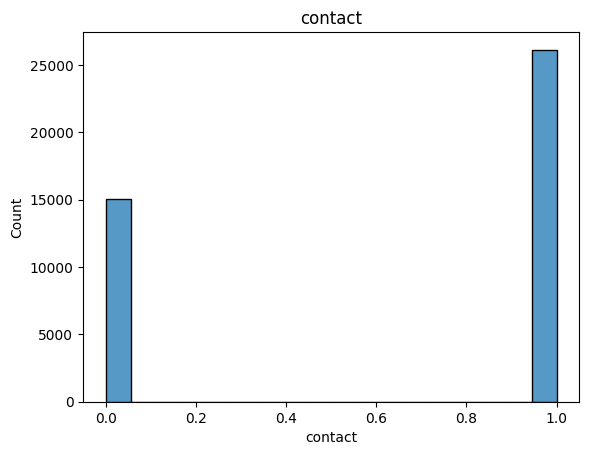

In [446]:
sns.histplot(df['contact'])
plt.title('contact')
# yes = 0.0 , no = 1.0

In [ ]:
sns.histplot(df['job'])

In [436]:
final_dict

{'housemaid': 0,
 'services': 1,
 'admin.': 2,
 'blue-collar': 3,
 'technician': 4,
 'retired': 5,
 'management': 6,
 'unemployed': 7,
 'self-employed': 8,
 'unknown': 2,
 'entrepreneur': 10,
 'student': 11,
 'married': 0,
 'single': 1,
 'divorced': 2,
 'basic.4y': 0,
 'high.school': 1,
 'basic.6y': 2,
 'basic.9y': 3,
 'professional.course': 4,
 'university.degree': 6,
 'illiterate': 7,
 'no': 0,
 'yes': 1,
 'telephone': 0,
 'cellular': 1,
 'may': 0,
 'jun': 1,
 'jul': 2,
 'aug': 3,
 'oct': 4,
 'nov': 5,
 'dec': 6,
 'mar': 7,
 'apr': 8,
 'sep': 9,
 'mon': 0,
 'tue': 1,
 'wed': 2,
 'thu': 3,
 'fri': 4,
 'nonexistent': 0,
 'failure': 1,
 'success': 2}

<Axes: xlabel='marital', ylabel='Count'>

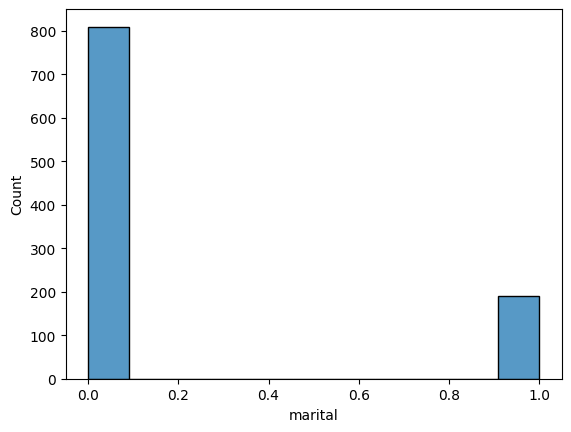

In [438]:
sns.histplot(df['marital'][:1000])